In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
def display(image, cmap = 'gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap)

In [51]:
####################################################################
## Feature Matching                                               ##
##  1. Brute-force matching with ORB Descriptors                  ##
##  2. Brute-force matching with SIFT Descriptors and Ratio Test  ##
##  3. FLANN based Mathcer                                        ##
####################################################################

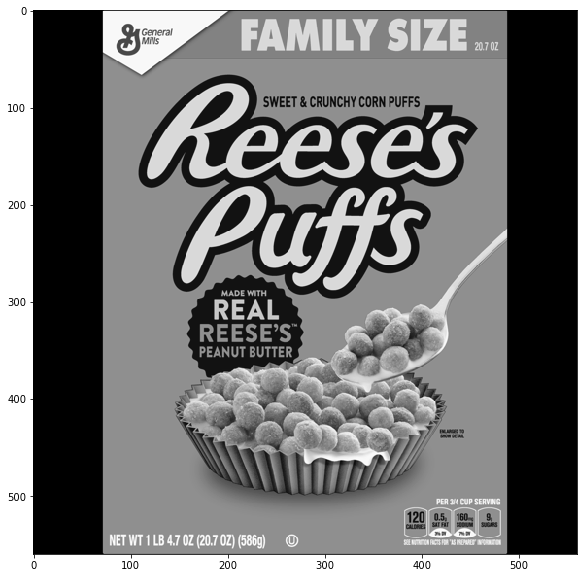

In [52]:
reeses = cv2.imread('../../DATA/reeses_puffs.png', 0)
display(reeses)

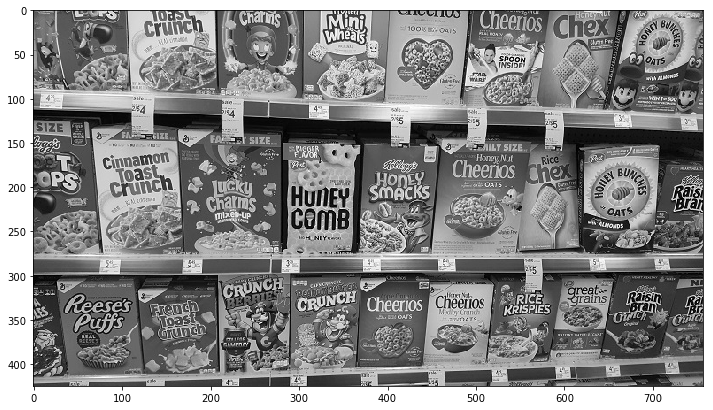

In [53]:
cereals = cv2.imread('../../DATA/many_cereals.jpg', 0)
display(cereals)

In [54]:
###############################################################
## Brute-force matching with SIFT Descriptors and Ratio Test ##
###############################################################

In [55]:
sift = cv2.xfeatures2d.SIFT_create()

In [56]:
keypoint_1, description_1 = sift.detectAndCompute(reeses, None)
keypoint_2, description_2 = sift.detectAndCompute(cereals, None)

In [57]:
bruce_force = cv2.BFMatcher()

In [58]:
matches = bruce_force.knnMatch(
    description_1,
    description_2,
    k = 2
)

In [63]:
print(matches[0])
print(matches[1])
print(matches[2])
print(len(matches))

[<DMatch 0000018B85B83FD0>, <DMatch 0000018B87A98EF0>]
[<DMatch 0000018B8794E610>, <DMatch 0000018B8794E650>]
[<DMatch 0000018B8794E630>, <DMatch 0000018B8794E230>]
1500


In [66]:
good = []

# Less distance == Better match

# Ratio match 1 < 75% * match 2
for match_1, match_2 in matches:
    
    # If match 1 distance is less than 7% of match 2 distance
    #  then, descriptor was a good match.
    #  let's keep it!
    if match_1.distance < 0.75 * match_2.distance:
        
        good.append([match_1])
        
print(good[0])
print(good[1])
print(good[2])
print(len(good))

[<DMatch 0000018B85C344D0>]
[<DMatch 0000018B85C34A90>]
[<DMatch 0000018B85C34AD0>]
78


In [70]:
sift_matches = cv2.drawMatchesKnn(
    reeses,
    keypoint_1,
    cereals,
    keypoint_2,
    good,
    None,
    flags = 2
)

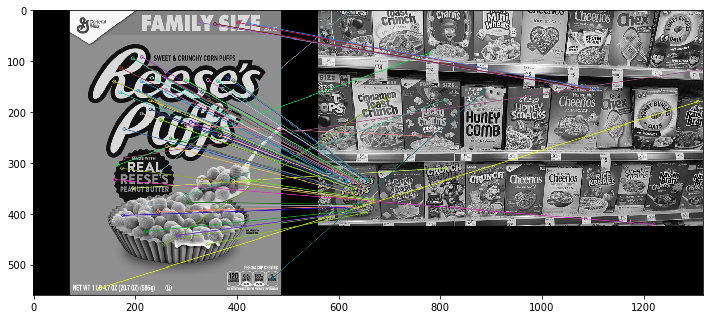

In [73]:
display(sift_matches)